___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [ ]:
#!pip install folium 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
df2 = pd.read_csv(r"C:\Users\ABC\Desktop\Yazilim\Deep Learning\Assignment-1\Churn_Modelling.csv")

In [4]:
df=df2.copy()

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# surname, geography and gender are object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


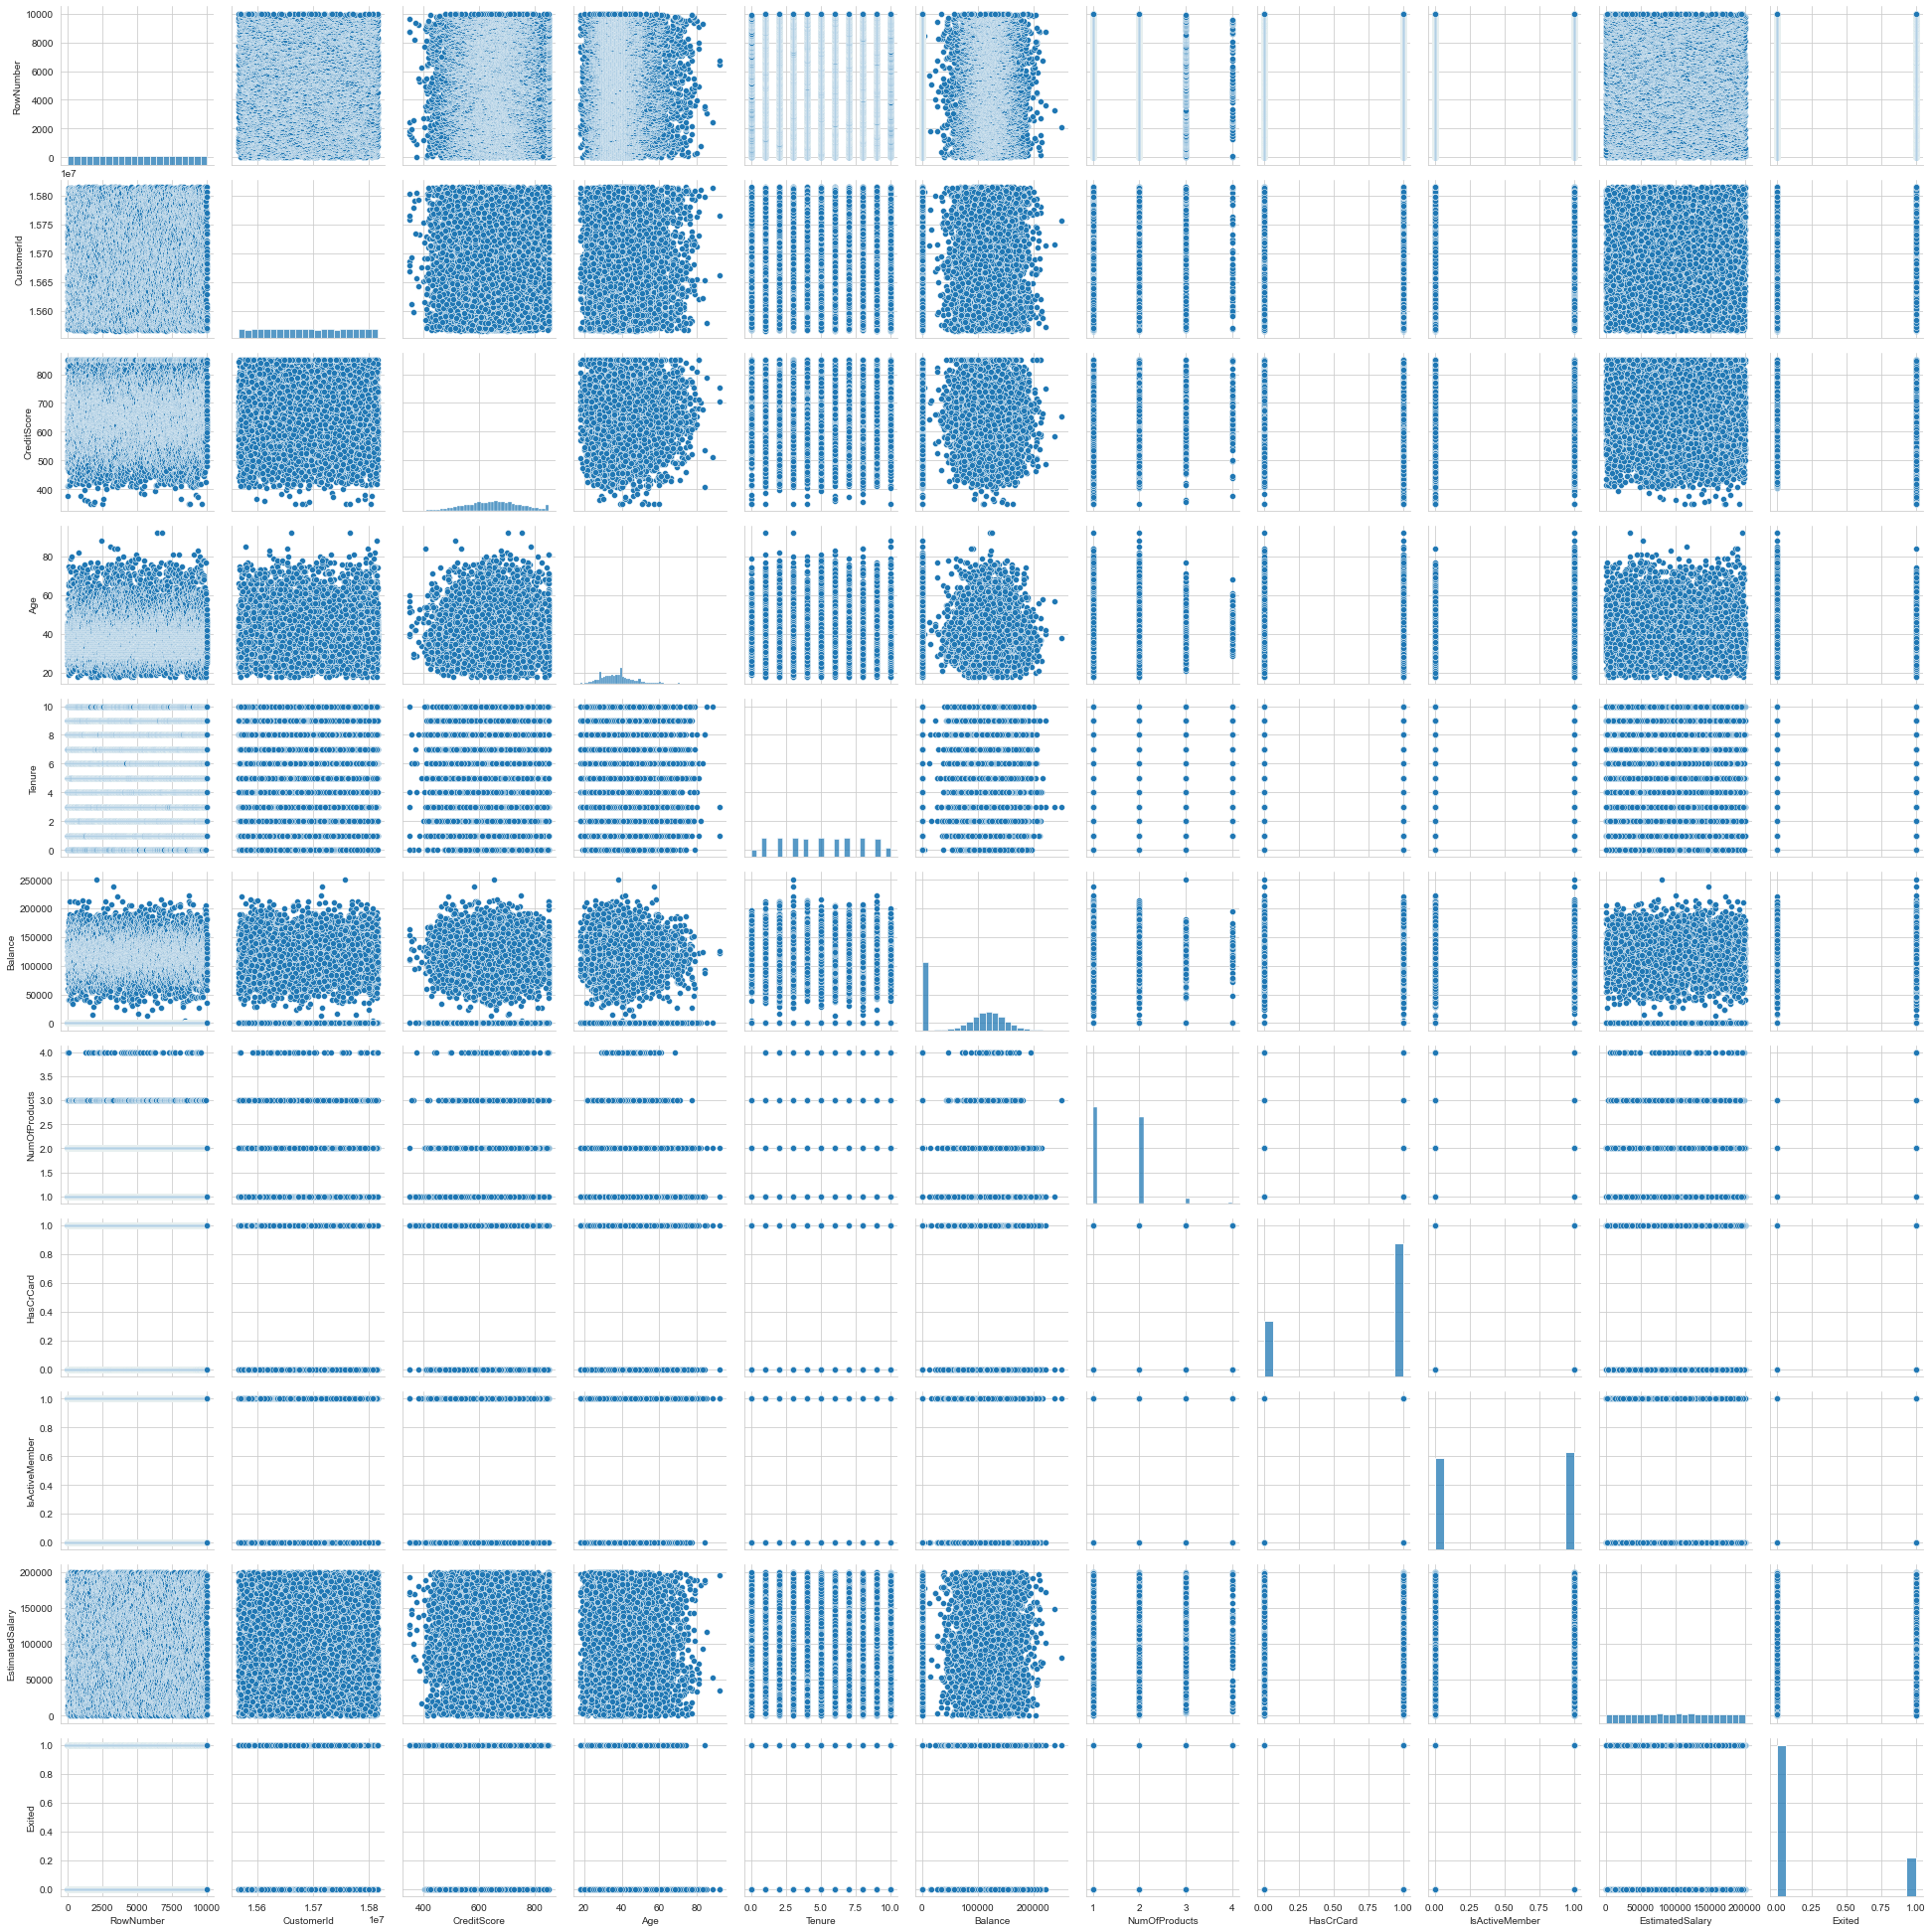

In [8]:
sns.pairplot(df);

In [9]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000,0.004,0.006,0.001,-0.006,-0.009,0.007,0.001,0.012,-0.006,-0.017
CustomerId,0.004,1.000,0.005,0.009,-0.015,-0.012,0.017,-0.014,0.002,0.015,-0.006
CreditScore,0.006,0.005,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,0.001,0.009,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,-0.006,-0.015,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,-0.009,-0.012,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.007,0.017,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,0.001,-0.014,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.012,0.002,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.006,0.015,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012


In [10]:
df.isnull().sum().any()

False

In [11]:
df = df.drop('RowNumber', axis = 1)

In [12]:
df = df.drop('CustomerId', axis = 1)

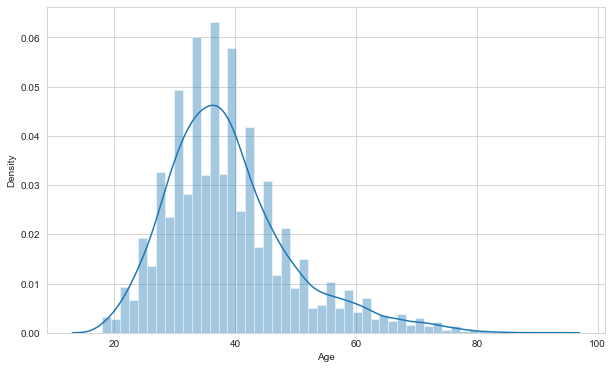

In [13]:
sns.distplot(df['Age']);

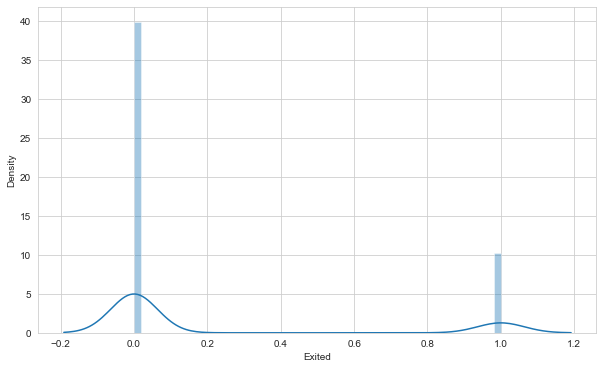

In [14]:
sns.distplot(df['Exited']);

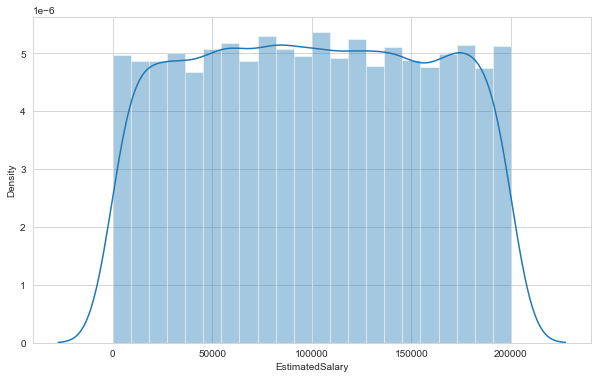

In [15]:
sns.distplot(df['EstimatedSalary']);

In [ ]:
# salary yaklasik olarak uniform dagilmis durumda..

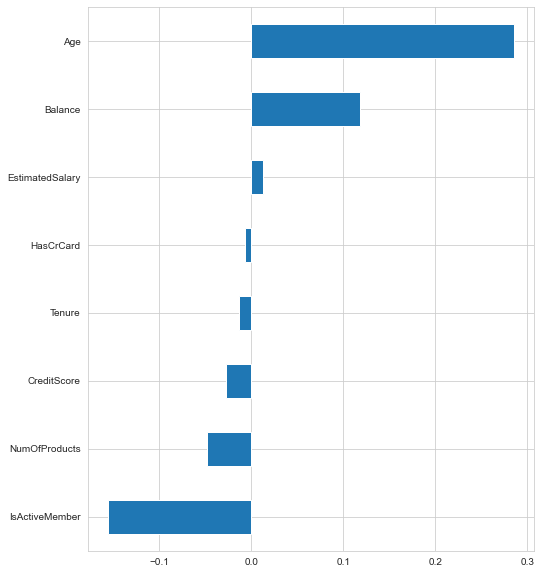

In [16]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh"); # Exited ile korrelasyon

In [ ]:
# Yas etkili cikti, ilginc...

In [17]:
df.shape

(10000, 12)

In [ ]:
#11 adet feature mevcut..

In [18]:
df = pd.get_dummies(df, columns=['Gender'])
df.head(15)

,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male
0,Hargrave,619,France,42,2,0.000,1,1,1,101348.880,1,1,0
1,Hill,608,Spain,41,1,83807.860,1,0,1,112542.580,0,1,0
2,Onio,502,France,42,8,159660.800,3,1,0,113931.570,1,1,0
3,Boni,699,France,39,1,0.000,2,0,0,93826.630,0,1,0
4,Mitchell,850,Spain,43,2,125510.820,1,1,1,79084.100,0,1,0
5,Chu,645,Spain,44,8,113755.780,2,1,0,149756.710,1,0,1
6,Bartlett,822,France,50,7,0.000,2,1,1,10062.800,0,0,1
7,Obinna,376,Germany,29,4,115046.740,4,1,0,119346.880,1,1,0
8,He,501,France,44,4,142051.070,2,0,1,74940.500,0,0,1
9,H?,684,France,27,2,134603.880,1,1,1,71725.730,0,0,1


In [19]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
# sadece 3 deger var.. Bunu da get dummies yapabiliriz..

In [20]:
df = pd.get_dummies(df, columns=['Geography'])
df.head(15)

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,Hargrave,619,42,2,0.000,1,1,1,101348.880,1,1,0,1,0,0
1,Hill,608,41,1,83807.860,1,0,1,112542.580,0,1,0,0,0,1
2,Onio,502,42,8,159660.800,3,1,0,113931.570,1,1,0,1,0,0
3,Boni,699,39,1,0.000,2,0,0,93826.630,0,1,0,1,0,0
4,Mitchell,850,43,2,125510.820,1,1,1,79084.100,0,1,0,0,0,1
5,Chu,645,44,8,113755.780,2,1,0,149756.710,1,0,1,0,0,1
6,Bartlett,822,50,7,0.000,2,1,1,10062.800,0,0,1,1,0,0
7,Obinna,376,29,4,115046.740,4,1,0,119346.880,1,1,0,0,1,0
8,He,501,44,4,142051.070,2,0,1,74940.500,0,0,1,1,0,0
9,H?,684,27,2,134603.880,1,1,1,71725.730,0,0,1,1,0,0


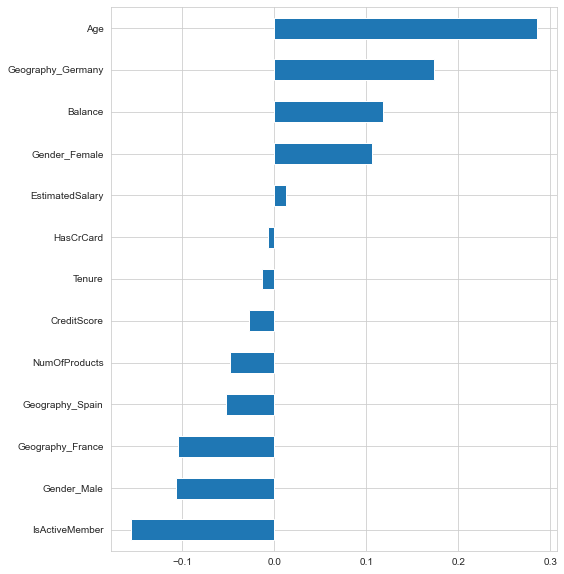

In [21]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh"); # Exited ile korrelasyon

In [25]:
df = df.drop('Surname', axis = 1)

KeyError: "['Surname'] not found in axis"

In [ ]:
#Iki kez calistirdim onun icin bu hata ile karsilastim.

# Preprocessing of Data
- Train | Test Split, Scalling

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [28]:
seed = 60 # I'm from Tokat

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.175, random_state=seed)

In [30]:
from sklearn.preprocessing import MinMaxScaler  # RobustScaler()

# If there are too many outliers in the data, robust scaler should be used, otherwise minmax can be used.
# I didn't see too much outliers

In [31]:
scaler = MinMaxScaler()

In [32]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train.shape

(8250, 13)

In [34]:
X_test.shape

(1750, 13)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [ ]:
#Yanlis anlamadi isem ilk önce normallogistic regression ile deneyecegiz..

In [ ]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [ ]:
a,b = make_classification (n_samples = 100,
                           n_features= 1,
                           n_classes = 2,
                           n_clusters_per_class  =1,
                           flip_y =0.03,
                           n_informative=1,
                           n_redundant=0,
                           n_repeated=0)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [35]:
#Lets Visualize our Data

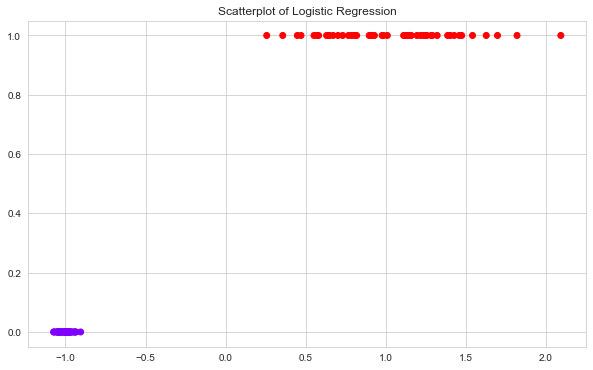

In [38]:
plt.scatter (a,b, c=b, cmap="rainbow")
plt.title ('Scatterplot of Logistic Regression')
plt.show()

In [39]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [41]:
logmodel.coef_

array([[-3.73011110e-01,  5.10573908e+00, -1.58059034e-01,
         6.40233294e-01, -3.36738008e-01, -1.57106378e-02,
        -1.00169436e+00, -4.95500852e-03,  2.58083465e-01,
        -2.57658794e-01, -2.70791275e-01,  4.97743891e-01,
        -2.26527945e-01]])

In [42]:
logmodel.intercept_

array([-2.29424675])

In [ ]:
#Let's make prediction:

In [44]:
y_pred= logmodel.predict(X_test)

In [45]:
confusion_matrix (y_test, y_pred)

array([[1338,   41],
       [ 285,   86]], dtype=int64)

In [ ]:
#fena degil..

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [47]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [48]:
eval_metric(y_test, y_pred)

r2_score: -0.1151093901788276 
mae: 0.18628571428571428 
mse: 0.18628571428571428 
rmse: 0.43160828801786727


In [75]:
from sklearn import metrics

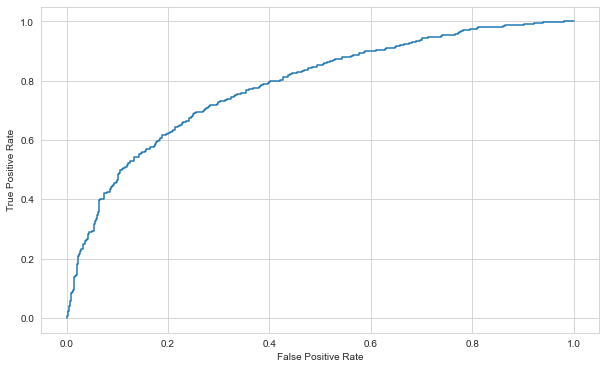

In [52]:
#define metrics
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [54]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train.shape[1])) # nöron sayisi 24 11'in yaklasik 1,5 kati... 
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer.  
model.add(Dense(24, activation = 'relu')) # Input layer normalde 16 neron, ama bunu ilk hidden layer icerisine yedirdik.
model.add(Dense(12, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                336       
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dense_2 (Dense)             (None, 12)                300       
                                                                 
 dense_3 (Dense)             (None, 6)                 78        
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 24) dtype=float32, numpy=
 array([[-0.01373091,  0.29567868, -0.30941653,  0.38416088, -0.00336486,
         -0.2951175 ,  0.21653754, -0.24856964, -0.39127433,  0.19356954,
         -0.29062063,  0.183294  , -0.03453544,  0.0783816 ,  0.34349513,
          0.07343969,  0.31762898, -0.2586807 ,  0.35542876, -0.10782784,
          0.25580359, -0.33219817, -0.3868509 ,  0.03606966],
        [-0.11468562, -0.02069691, -0.17535336,  0.3583349 ,  0.39818788,
          0.01910651,  0.15983415,  0.03873846,  0.3926897 , -0.30547667,
         -0.36677873, -0.34813643, -0.16437465, -0.3986951 ,  0.26179928,
          0.3221044 , -0.10050741,  0.24421644,  0.38139194,  0.06535798,
          0.2214303 ,  0.30672717,  0.02703968, -0.09039825],
        [ 0.07040271,  0.20440012, -0.1164858 ,  0.04966798, -0.3532862 ,
          0.31701875,  0.36816412,  0.23664379, -0.17142752, -0.03401843,
         -0.00241944, -0.14372566, -0.20232803,  0.21019495, -0.3995

In [57]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000) # validation split - > Data'nin son yüzde 15'ini validation icin ayirir. datayi ayirmadan shuffle etse idi data leakage olurdu. Shuffle edip sonra X_train, validation olarak ayiriyor.
#Burada x_train'in yüzde 15'ini aliyoruz. Her seybitince x_test sonra..

Epoch 1/1000
55/55 [==============================] - 1s 6ms/step - loss: 0.1612 - val_loss: 0.1409
Epoch 2/1000
55/55 [==============================] - 0s 3ms/step - loss: 0.1503 - val_loss: 0.1352
Epoch 3/1000
55/55 [==============================] - 0s 2ms/step - loss: 0.1457 - val_loss: 0.1327
Epoch 4/1000
55/55 [==============================] - 0s 3ms/step - loss: 0.1410 - val_loss: 0.1277
Epoch 5/1000
55/55 [==============================] - 0s 2ms/step - loss: 0.1371 - val_loss: 0.1255
Epoch 6/1000
55/55 [==============================] - 0s 2ms/step - loss: 0.1340 - val_loss: 0.1243
Epoch 7/1000
55/55 [==============================] - 0s 2ms/step - loss: 0.1322 - val_loss: 0.1243
Epoch 8/1000
55/55 [==============================] - 0s 2ms/step - loss: 0.1316 - val_loss: 0.1210
Epoch 9/1000
55/55 [==============================] - 0s 3ms/step - loss: 0.1290 - val_loss: 0.1195
Epoch 10/1000
55/55 [==============================] - 0s 2ms/step - loss: 0.1264 - val_loss: 0.1191

In [ ]:
# Umarim 1000 Epoch fazla olmamistir..

In [58]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 24) dtype=float32, numpy=
 array([[-0.00687343,  0.08743878, -0.88437337,  0.37559515,  0.20623393,
         -0.5251368 ,  0.18511273, -0.28192723, -0.14275336,  0.24582165,
         -0.29062063,  0.24422401, -0.09962872, -0.23618819,  0.43750396,
          0.3113593 ,  0.3355078 , -0.21097101,  0.59229225, -0.39701054,
          0.11533727, -0.22987771, -0.45651087, -0.34589773],
        [ 0.02692687,  0.10826984, -0.16970333,  0.0800287 ,  1.0785613 ,
         -0.25950944, -0.3552244 ,  0.25089708,  0.9175233 , -0.0366875 ,
         -0.36677873, -1.055231  , -0.34172913, -0.68179345,  0.13094157,
          0.9043659 , -0.29016316,  1.2317842 ,  0.53071815,  0.44273967,
         -0.28343076,  0.89008015, -0.73356795,  0.32199028],
        [ 0.38725322,  0.3496742 , -0.53919387,  0.14576335, -0.29163045,
          0.19528176,  0.37961718,  0.57832605, -0.22462313,  0.38421306,
         -0.00241944,  0.02149993, -0.4805762 ,  0.3847413 , -0.5606

In [59]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.161,0.141
1,0.150,0.135
2,0.146,0.133
3,0.141,0.128
4,0.137,0.125
...,...,...
995,0.071,0.129
996,0.072,0.136
997,0.071,0.138
998,0.073,0.142


<AxesSubplot:>

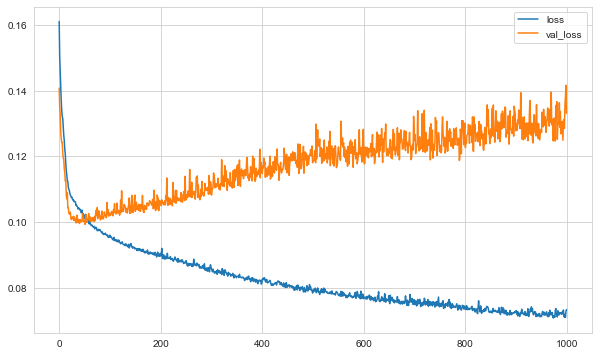

In [60]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
# sanirim 10000 epoch fazla olmus. ben bunu sonra 100 yapayim..

In [61]:
model.evaluate(X_test, y_test, verbose=0)

0.15250791609287262

In [62]:
y_pred = model.predict(X_test)

55/55 [==============================] - 0s 1ms/step


In [63]:
eval_metric(y_test, y_pred)

r2_score: 0.08708513897884118 
mae: 0.2307174529241664 
mse: 0.15250790502275074 
rmse: 0.3905226050086611


In [ ]:
# rmse'ye göre daha iyi, r2 score 'a göre de.. mae biraz artti. Ancak eopch'u 100 yapinca biraz daha düzelecegini düsünüyorum
#Batch size ayni kalsin..

In [65]:
# hadi epoch 100 ile deneyelim..

model2 = Sequential()

model2.add(Dense(24, activation = 'relu', input_dim = X_train.shape[1])) # nöron sayisi 24 11'in yaklasik 1,5 kati... 
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer.  
model2.add(Dense(24, activation = 'relu')) # Input layer normalde 16 neron, ama bunu ilk hidden layer icerisine yedirdik.
model2.add(Dense(12, activation = 'relu'))
model2.add(Dense(6, activation = 'relu'))
model2.add(Dense(1))

model2.compile(optimizer = 'adam', loss = 'mse')

model2.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 100)

Epoch 1/100
55/55 [==============================] - 1s 5ms/step - loss: 0.1657 - val_loss: 0.1448
Epoch 2/100
55/55 [==============================] - 0s 2ms/step - loss: 0.1544 - val_loss: 0.1403
Epoch 3/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1513 - val_loss: 0.1380
Epoch 4/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1480 - val_loss: 0.1344
Epoch 5/100
55/55 [==============================] - 0s 2ms/step - loss: 0.1445 - val_loss: 0.1307
Epoch 6/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1405 - val_loss: 0.1276
Epoch 7/100
55/55 [==============================] - 0s 2ms/step - loss: 0.1367 - val_loss: 0.1244
Epoch 8/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1329 - val_loss: 0.1194
Epoch 9/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1285 - val_loss: 0.1153
Epoch 10/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1232 - val_loss: 0.1124
Epoch 11/

In [66]:
pd.DataFrame(model2.history.history)

,loss,val_loss
0,0.166,0.145
1,0.154,0.140
2,0.151,0.138
3,0.148,0.134
4,0.144,0.131
...,...,...
95,0.094,0.098
96,0.094,0.098
97,0.093,0.098
98,0.093,0.097


<AxesSubplot:>

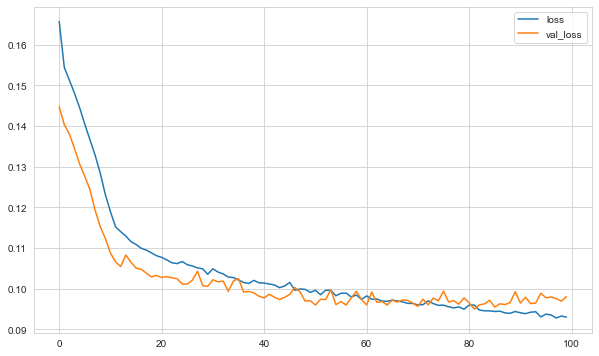

In [67]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.plot()

In [ ]:
#Biraz daha düzeldi..

In [68]:
model2.evaluate(X_test, y_test, verbose=0)

0.10878021270036697

In [69]:
y_pred = model2.predict(X_test)

55/55 [==============================] - 0s 1ms/step


In [70]:
eval_metric(y_test, y_pred)

r2_score: 0.3488398043662927 
mae: 0.21841307956831796 
mse: 0.10878021764178464 
rmse: 0.329818461644864


In [ ]:
#r2_score 0,9 filan olsa daha iyi olurdu..
#biraz da baska birseyler deneyelim..

In [106]:
tf.random.set_seed(seed)

model4 = Sequential()

model4.add(Dense(24, activation = 'relu', input_dim = X_train.shape[1])) # nöron sayisi 24 11'in yaklasik 1,5 kati... 
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer.  
model4.add(Dense(24, activation = 'relu')) # Input layer normalde 16 neron, ama bunu ilk hidden layer icerisine yedirdik.
model4.add(Dense(12, activation = 'relu'))
model4.add(Dense(6, activation = 'relu'))
model4.add(Dense(1))

model4.compile(optimizer = 'adam', loss = 'mse', metrics=['Recall'])

In [107]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6265188335358445, 1: 2.4759903961584633}

In [108]:
model4.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 300, verbose=1, class_weight=class_weights)

Epoch 1/300
55/55 [==============================] - 1s 8ms/step - loss: 0.2455 - recall: 0.5366 - val_loss: 0.2270 - val_recall: 0.6623
Epoch 2/300
21/55 [==========>...................] - ETA: 0s - loss: 0.2206 - recall: 0.6649

InvalidArgumentError: Graph execution error:

Detected at node 'assert_less_equal/Assert/AssertGuard/Assert' defined at (most recent call last):
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
      app.start()
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
      self.io_loop.start()
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\tornado\ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
      ret = callback()
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\tornado\gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\tornado\gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2894, in run_cell
      result = self._run_cell(
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3165, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3357, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-108-2802e54cfef3>", line 1, in <module>
      model4.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 300, verbose=1, class_weight=class_weights)
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\keras\engine\training.py", line 894, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\keras\engine\training.py", line 987, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\keras\engine\compile_utils.py", line 501, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\keras\utils\metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\keras\metrics\metrics.py", line 949, in update_state
      return metrics_utils.update_confusion_matrix_variables(
    File "C:\Users\ABC\KKK\Programlar\Anaconda\lib\site-packages\keras\utils\metrics_utils.py", line 606, in update_confusion_matrix_variables
      tf.debugging.assert_less_equal(
Node: 'assert_less_equal/Assert/AssertGuard/Assert'
assertion failed: [predictions must be <= 1] [Condition x <= y did not hold element-wise:] [x (sequential_7/dense_39/BiasAdd:0) = ] [[0.24519597][0.347979][0.559997201]...] [y (Cast_6/x:0) = ] [1]
	 [[{{node assert_less_equal/Assert/AssertGuard/Assert}}]] [Op:__inference_train_function_288272]

In [ ]:
#Bu hatayi neden aldim anlayamadim..

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
# Bir kismini yukarida yaptik.. Digerini buradan devam edelim..


In [71]:
y_pred= model2.predict(X_test)

55/55 [==============================] - 0s 2ms/step


In [73]:
confusion_matrix (y_test, y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
# Bu hatayi neden verdi anlayamadim..

In [76]:
#define metrics
y_pred_proba = model2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [ ]:
# Bu hatanin sebebini de anlayamadim..

55/55 [==============================] - 0s 2ms/step


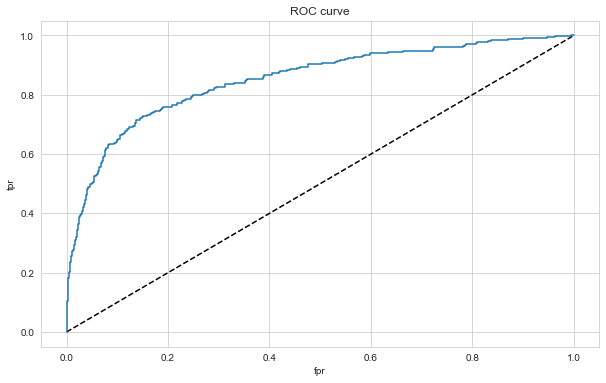

In [122]:
y_pred_proba = model2.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [124]:
metrics.roc_auc_score(y_test, y_pred_proba)# alttaki oldu, üstteki olmadi.

0.851026858401631

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [77]:
from tensorflow.keras.optimizers import Adam

In [78]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

opt = Adam(lr = 0.003) # default learning rate value is 0.001. Bu kapsamda lr 3 kat arttirmis olduk..
model.compile(optimizer = opt, loss = 'mse')

In [79]:
model.weights

[<tf.Variable 'dense_10/kernel:0' shape=(13, 24) dtype=float32, numpy=
 array([[-0.01373091,  0.29567868, -0.30941653,  0.38416088, -0.00336486,
         -0.2951175 ,  0.21653754, -0.24856964, -0.39127433,  0.19356954,
         -0.29062063,  0.183294  , -0.03453544,  0.0783816 ,  0.34349513,
          0.07343969,  0.31762898, -0.2586807 ,  0.35542876, -0.10782784,
          0.25580359, -0.33219817, -0.3868509 ,  0.03606966],
        [-0.11468562, -0.02069691, -0.17535336,  0.3583349 ,  0.39818788,
          0.01910651,  0.15983415,  0.03873846,  0.3926897 , -0.30547667,
         -0.36677873, -0.34813643, -0.16437465, -0.3986951 ,  0.26179928,
          0.3221044 , -0.10050741,  0.24421644,  0.38139194,  0.06535798,
          0.2214303 ,  0.30672717,  0.02703968, -0.09039825],
        [ 0.07040271,  0.20440012, -0.1164858 ,  0.04966798, -0.3532862 ,
          0.31701875,  0.36816412,  0.23664379, -0.17142752, -0.03401843,
         -0.00241944, -0.14372566, -0.20232803,  0.21019495, -0.3

In [80]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 100)

Epoch 1/100
55/55 [==============================] - 1s 5ms/step - loss: 0.1553 - val_loss: 0.1338
Epoch 2/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1426 - val_loss: 0.1381
Epoch 3/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1344 - val_loss: 0.1215
Epoch 4/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1269 - val_loss: 0.1131
Epoch 5/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1196 - val_loss: 0.1085
Epoch 6/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1165 - val_loss: 0.1058
Epoch 7/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1138 - val_loss: 0.1126
Epoch 8/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1123 - val_loss: 0.1010
Epoch 9/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1109 - val_loss: 0.1037
Epoch 10/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1101 - val_loss: 0.1018
Epoch 11/

<AxesSubplot:>

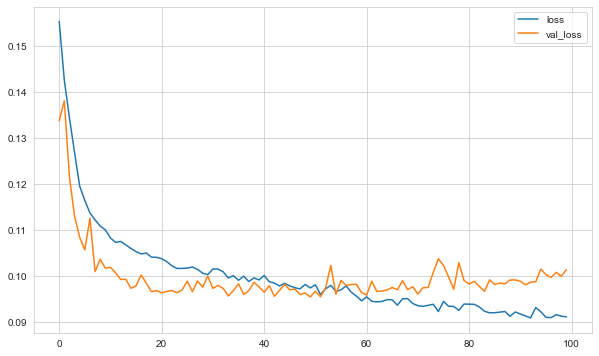

In [81]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
#val_loss cok erken artmaya basladi görüldügü gibi.. Bu lr'nin 3 kat büyük olmasindan dolayi..

In [82]:
y_pred = model.predict(X_test)

55/55 [==============================] - 0s 1ms/step


In [83]:
eval_metric(y_test, y_pred)

r2_score: 0.291934498568178 
mae: 0.2197512840261417 
mse: 0.11828659040719448 
rmse: 0.34392817623334454


In [ ]:
#model2'ye göre r2_score düstü..

### Add Dropout Layer

In [91]:
from tensorflow.keras.layers import Dropout

In [92]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(24, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [93]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [94]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
55/55 [==============================] - 1s 6ms/step - loss: 0.1828 - val_loss: 0.1496
Epoch 2/1000
55/55 [==============================] - 0s 4ms/step - loss: 0.1603 - val_loss: 0.1416
Epoch 3/1000
55/55 [==============================] - 0s 3ms/step - loss: 0.1572 - val_loss: 0.1403
Epoch 4/1000
55/55 [==============================] - 0s 3ms/step - loss: 0.1541 - val_loss: 0.1386
Epoch 5/1000
55/55 [==============================] - 0s 3ms/step - loss: 0.1505 - val_loss: 0.1387
Epoch 6/1000
55/55 [==============================] - 0s 3ms/step - loss: 0.1491 - val_loss: 0.1312
Epoch 7/1000
55/55 [==============================] - 0s 3ms/step - loss: 0.1454 - val_loss: 0.1303
Epoch 8/1000
55/55 [==============================] - 0s 3ms/step - loss: 0.1434 - val_loss: 0.1310
Epoch 9/1000
55/55 [==============================] - 0s 3ms/step - loss: 0.1397 - val_loss: 0.1246
Epoch 10/1000
55/55 [==============================] - 0s 3ms/step - loss: 0.1359 - val_loss: 0.1180

In [ ]:
#Epoch'u tekrar 1000 secmis olmama ragmen early stop ile 61'de durdurdu..
#Not: Ilk önce asagidaki early stop'u yaptim sonra tekrar dropout blogunu yaptim..

<AxesSubplot:>

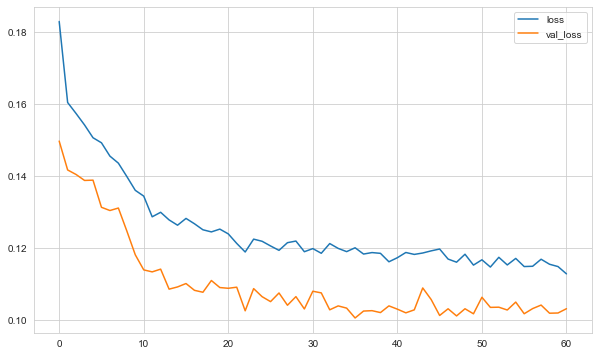

In [95]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [96]:
y_pred = model.predict(X_test)

55/55 [==============================] - 0s 1ms/step


In [97]:
eval_metric(y_test, y_pred)

r2_score: 0.3534563716668838 
mae: 0.23934654191987856 
mse: 0.10800899237481708 
rmse: 0.3286472156809138


In [ ]:
#r2_score ANN'dekilerin arasinda en iyisi..

### Add Early Stop

#### Monitor the "val_loss" as metric

In [84]:
from tensorflow.keras.callbacks import EarlyStopping

In [85]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [86]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [87]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 100, callbacks = [early_stop])

Epoch 1/100
55/55 [==============================] - 1s 5ms/step - loss: 0.1553 - val_loss: 0.1338
Epoch 2/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1426 - val_loss: 0.1381
Epoch 3/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1344 - val_loss: 0.1215
Epoch 4/100
55/55 [==============================] - 0s 2ms/step - loss: 0.1269 - val_loss: 0.1131
Epoch 5/100
55/55 [==============================] - 0s 2ms/step - loss: 0.1196 - val_loss: 0.1085
Epoch 6/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1165 - val_loss: 0.1058
Epoch 7/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1138 - val_loss: 0.1126
Epoch 8/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1123 - val_loss: 0.1010
Epoch 9/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1109 - val_loss: 0.1037
Epoch 10/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1101 - val_loss: 0.1018
Epoch 11/

In [ ]:
# Epoch 75'de durdurdu... Sonrasi zarar..

<AxesSubplot:>

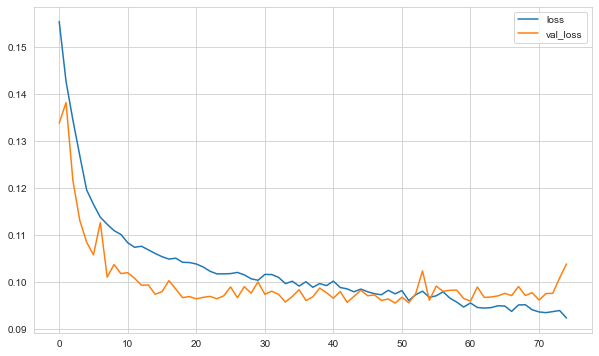

In [88]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [89]:
y_pred = model.predict(X_test)

55/55 [==============================] - 0s 2ms/step


In [90]:
eval_metric(y_test, y_pred)

r2_score: 0.3421932982590825 
mae: 0.205479947763096 
mse: 0.10989055636603073 
rmse: 0.3314974454894498


#### Monitor the "val_recall" as metric

## GridSearchCV

In [102]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [112]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [109]:
def build_classifier(optimizer, learn_rate): # Modeli fonksiyon icine kuruyorum
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 24, activation = 'relu'))
    classifier.add(Dense(units = 12, activation = 'relu'))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dense(units = 1))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'mse', metrics = ['accuracy'])
    return classifier

In [110]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200) # Kerasclassifier icine tanimladigim clasiifier i dösüyorun.

parameters = {'batch_size': [32, 64], # Gridseach ile hangi parametreleri denemek istiyorsam onlari yaziyorum..
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop]) # call_back'i fit ederken cagiriyorum. Datayi zaten cv = 10 diyerek 10 a böldüm, bir de yukarida validation split verdik.
#ic ice calisiyor. Once cv, sonra 

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200
117/117 [==============================] - 2s 4ms/step - loss: 0.1761 - accuracy: 0.7927 - val_loss: 0.1438 - val_accuracy: 0.8158
Epoch 2/200
117/117 [==============================] - 0s 3ms/step - loss: 0.1541 - accuracy: 0.7964 - val_loss: 0.1388 - val_accuracy: 0.8145
Epoch 3/200
117/117 [==============================] - 0s 3ms/step - loss: 0.1497 - accuracy: 0.7982 - val_loss: 0.1567 - val_accuracy: 0.8121
Epoch 4/200
117/117 [==============================] - 0s 3ms/step - loss: 0.1464 - accuracy: 0.7995 - val_loss: 0.1320 - val_accuracy: 0.8242
Epoch 5/200
117/117 [==============================] - 0s 3ms/step - loss: 0.1433 - accuracy: 0.8012 - val_loss: 0.1281 - val_accuracy: 0.8230
Epoch 6/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1405 - accuracy: 0.8058 - val_loss: 0.1668 - val_accuracy: 0.7794
Epoch 7/200
117/117 [==============================] - 0s 3ms/step - loss: 0.14

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000012AD78004F0>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

In [ ]:
#97'de early stopping yapti..

In [116]:
grid_model.best_score_

0.8615757575757576

In [117]:
grid_model.best_params_

{'batch_size': 64,
 'learn_rate': 0.001,
 'optimizer': keras.optimizers.optimizer_v2.nadam.Nadam}

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
#Bir kismini yukarida yaptik sanirim..

In [118]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
15,0.862,0.010,1,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
5,0.860,0.013,2,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
12,0.860,0.012,3,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
11,0.860,0.010,4,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
13,0.859,0.012,5,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
7,0.859,0.012,6,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
21,0.859,0.010,7,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
23,0.858,0.008,8,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
9,0.858,0.009,9,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
4,0.858,0.012,10,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."


In [120]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))


55/55 [==============================] - 0s 2ms/step
[[1323   56]
 [ 195  176]]


In [125]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

55/55 [==============================] - 0s 1ms/step


NameError: name 'roc_curve' is not defined

55/55 [==============================] - 0s 2ms/step


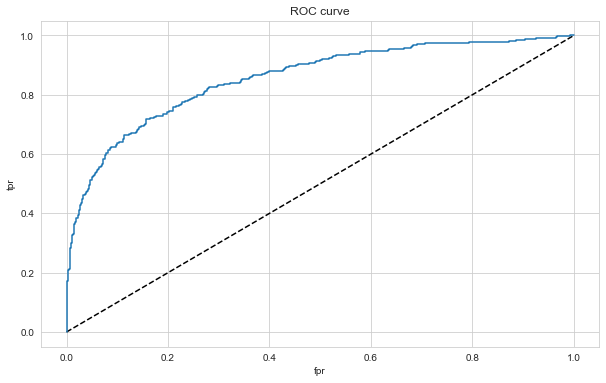

In [126]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [128]:
metrics.roc_auc_score(y_test, y_pred_proba)

0.8554247481963765

# Final Model and Model Deployment

In [143]:
import pickle
pickle.dump(scaler, open("assignment_1", 'wb'))

In [132]:
tf.random.set_seed(seed)

modelson = Sequential()

modelson.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
modelson.add(Dense(12, activation = "relu"))
modelson.add(Dense(6, activation = "relu"))
modelson.add(Dense(1))

modelson.compile(optimizer = "adam", loss = "mse", metrics = ["accuracy"])

In [131]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 35, restore_best_weights = True)

In [133]:
modelson.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 300, verbose = 1,
          callbacks = [early_stop]) # best_params'da batchsize 64 verdigi icin 64 yazdik..

Epoch 1/300
129/129 [==============================] - 1s 3ms/step - loss: 0.1714 - accuracy: 0.7958 - val_loss: 0.1561 - val_accuracy: 0.7886
Epoch 2/300
129/129 [==============================] - 0s 2ms/step - loss: 0.1523 - accuracy: 0.7985 - val_loss: 0.1499 - val_accuracy: 0.7914
Epoch 3/300
129/129 [==============================] - 0s 2ms/step - loss: 0.1471 - accuracy: 0.8011 - val_loss: 0.1435 - val_accuracy: 0.8029
Epoch 4/300
129/129 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.8038 - val_loss: 0.1401 - val_accuracy: 0.8074
Epoch 5/300
129/129 [==============================] - 0s 2ms/step - loss: 0.1392 - accuracy: 0.8087 - val_loss: 0.1394 - val_accuracy: 0.8074
Epoch 6/300
129/129 [==============================] - 0s 2ms/step - loss: 0.1366 - accuracy: 0.8127 - val_loss: 0.1373 - val_accuracy: 0.8103
Epoch 7/300
129/129 [==============================] - 0s 2ms/step - loss: 0.1347 - accuracy: 0.8131 - val_loss: 0.1363 - val_accuracy: 0.8091

In [ ]:
#104'te early stop yapti..

<AxesSubplot:>

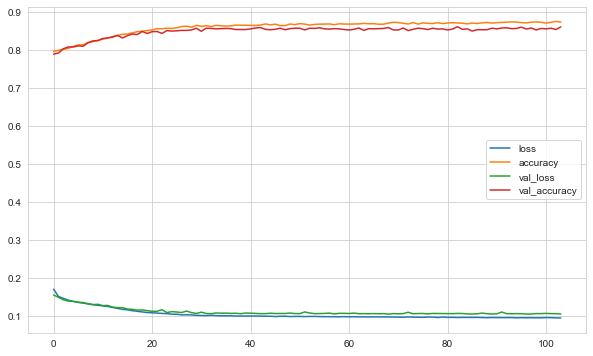

In [134]:
loss_df = pd.DataFrame(modelson.history.history)
loss_df.plot()

In [135]:
loss, accuracy = modelson.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.10595620423555374
accuracy :  0.8582857251167297


In [136]:
y_pred = modelson.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

55/55 [==============================] - 0s 2ms/step
[[1308   71]
 [ 177  194]]


NameError: name 'classification_report' is not defined

In [137]:
from sklearn.metrics import classification_report

In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1379
           1       0.73      0.52      0.61       371

    accuracy                           0.86      1750
   macro avg       0.81      0.74      0.76      1750
weighted avg       0.85      0.86      0.85      1750



In [ ]:
#tmm bunu import etmeyi atlamisim..

In [139]:
model.save('benim_ilk_modelim_sagolun_edward_hocam.h5')

In [140]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Female',
       'Gender_Male', 'Geography_France', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

## Prediction

In [141]:
tahmin_et = df.drop('Exited', axis = 1).iloc[0:1, :]
tahmin_et

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.000,1,1,1,101348.880,1,0,1,0,0


In [144]:
tahmin_et = assignment_1.transform(tahmin_et)
tahmin_et

NameError: name 'assignment_1' is not defined

In [145]:
from tensorflow.keras.models import load_model

In [146]:
modell_ = load_model('benim_ilk_modelim_sagolun_edward_hocam.h5')
scalerr_ = pickle.load(open("assignment_1", "rb"))

In [147]:
tahmin_et = assignment_1.transform(tahmin_et)
tahmin_et

NameError: name 'assignment_1' is not defined

In [150]:
(modelson.predict(tahmin_et) > 0.5).astype("int32")

1/1 [==============================] - 0s 79ms/step


array([[1]])

In [151]:
df["Exited"].iloc[0]

1

In [ ]:
#En azndan tahminimiz dogru cikti..

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___